In [1]:
import wradlib as wrl
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = wrl.io.read_generic_netcdf('./NETCDF5_kochi_weather_2018_08_01_00_02_03 (1).nc')
data['variables'].keys()

odict_keys(['esStartTime', 'elevationNumber', 'radialAzim', 'radialElev', 'radialTime', 'siteLat', 'siteLon', 'siteAlt', 'firstgateRange', 'gateSize', 'nyquist', 'unambigrange', 'RadarConst', 'beamWidthHori', 'pulseWidth', 'elevationList', 'azimuthSpeed', 'highPRF', 'lowPRF', 'waveLength', 'groundHeight', 'angleResolution', 'sampleNum', 'SQIThresh', 'LOGThresh', 'beamWidthVert', 'Z', 'V', 'W', 'ZDR', 'PHIDP', 'RHOHV'])

In [3]:
print(data['variables']['siteLat']['data'], ',', data['variables']['siteLon']['data'], ',', data['variables']['siteAlt']['data'])
print(data['variables']['elevationNumber']['data'])
print(data['variables']['firstgateRange']['data'])
print(data['variables']['gateSize']['data'])
print(data['variables']['radialElev']['data'].shape)
print(data['variables']['groundHeight']['data'])
print(data['variables']['unambigrange']['data'])
print(data['variables']['elevationList']['data'])
print(data['variables']['highPRF']['data'])
print(data['variables']['lowPRF']['data'])
print(data['variables']['waveLength']['data'])

9.9263 , 76.2622 , 30.0
2
0.0
300.0
(360,)
30.0
500.0
[0. 1.]
300.0
0.0
5.3333335


In [4]:
dbz = data['variables']['Z']['data']
range = np.arange(0.0,1633*300.0,300.0)
azims = np.arange(0.0,360.0)

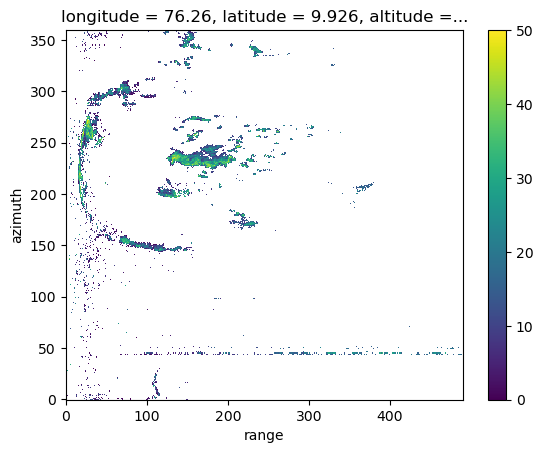

In [5]:
dbz[dbz<0.0] = np.nan
radar_location = (76.2622,9.9263,30.0) # Longitude first in the site coords tuple
da = wrl.georef.create_xarray_dataarray(
    dbz[0],
    r=range/1000.0,
    phi=azims,
    theta=data['variables']['elevationList']['data'][0],
    site=radar_location,
    sweep_mode="azimuth_surveillance",
)

da.plot()

In [6]:
da = da.wrl.georef.georeference()
display(da)

<xarray.DataArray (azimuth: 360, range: 1633)> Size: 2MB
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates: (12/14)
  * range       (range) float64 13kB 0.0 0.3 0.6 0.9 ... 488.7 489.0 489.3 489.6
  * azimuth     (azimuth) float64 3kB 0.0 1.0 2.0 3.0 ... 357.0 358.0 359.0
    elevation   (azimuth) float64 3kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    longitude   float64 8B 76.26
    latitude    float64 8B 9.926
    altitude    float64 8B 30.0
    ...          ...
    y           (azimuth, range) float64 5MB 0.0 0.3 0.6 ... 488.9 489.2 489.5
    z           (azimuth, range) float64 5MB 30.0 30.0 30.0 ... 30.01 30.01
    gr          (azimuth, range) float64 5MB 0.0 0.3 0.6 ... 489.0 489.3 489.6
    rays        (azimuth, range) float64 5MB 0.0 0.0 0.0 ... 359.0 359.0 359.0
    bins        (azimuth, range) float64 5MB 0.0 0.3 0.6 ... 489.0 489.3 489.6
    crs_wkt     int64 8B 0

In [7]:
dbz[dbz<0.0] = np.nan
img = wrl.georef.create_xarray_dataarray(dbz[0], r=range/1000.0, phi=azims, site=(76.2622,9.9263,30.0)) # Longitude first in the site coords tuple 

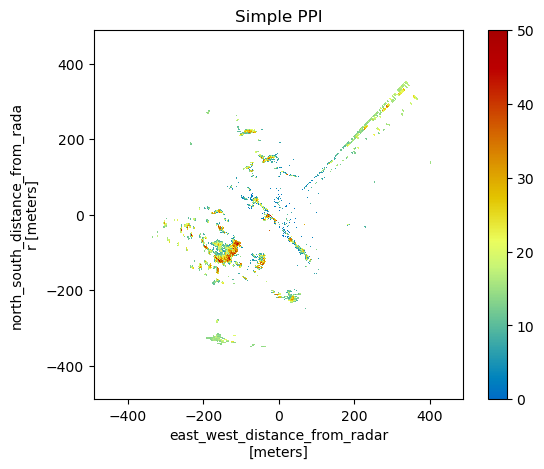

In [8]:
img = img.wrl.georef.georeference()
pm = img.wrl.vis.plot()
txt = plt.title("Simple PPI")

## Clutter Mitigation ##

### 1. Gabella Filter ###

/home/users/sambit15/.local/lib/python3.11/site-packages/wradlib/classify.py:106: RuntimeWarning: invalid value encountered in subtract
  count += (obj - refr) < tr1


Text(0.5, 1.0, 'Clutter Map')

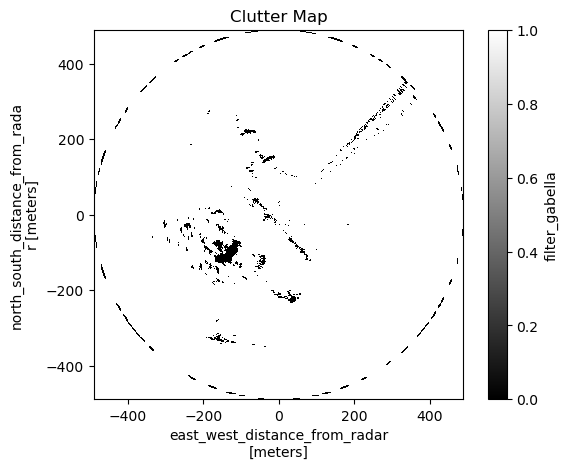

In [9]:
clutter = da.wrl.classify.filter_gabella(wsize=5, thrsnorain=10.0, tr1=12.0, n_p=8, tr2=1.5)
pm = clutter.wrl.vis.plot(cmap=plt.cm.gray)
plt.title("Clutter Map")

In [10]:
display(clutter)

<xarray.DataArray 'filter_gabella' (azimuth: 360, range: 1633)> Size: 588kB
array([[False, False,  True, ...,  True, False, False],
       [False, False,  True, ...,  True, False, False],
       [False, False,  True, ...,  True, False, False],
       ...,
       [False, False,  True, ...,  True, False, False],
       [False, False,  True, ...,  True, False, False],
       [False, False,  True, ...,  True, False, False]])
Coordinates: (12/14)
  * range       (range) float64 13kB 0.0 0.3 0.6 0.9 ... 488.7 489.0 489.3 489.6
  * azimuth     (azimuth) float64 3kB 0.0 1.0 2.0 3.0 ... 357.0 358.0 359.0
    elevation   (azimuth) float64 3kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    longitude   float64 8B 76.26
    latitude    float64 8B 9.926
    altitude    float64 8B 30.0
    ...          ...
    y           (azimuth, range) float64 5MB 0.0 0.3 0.6 ... 488.9 489.2 489.5
    z           (azimuth, range) float64 5MB 30.0 30.0 30.0 ... 30.01 30.01
    gr          (azimuth, range) float64 5MB 0.0 0.3 0.6 ... 489.0 489.3 489.6
    rays        (azimuth, range) float64 5MB 0.0 0.0 0.0 ... 359.0 359.0 359.0
    bins        (azimuth, range) float64 5MB 0.0 0.3 0.6 ... 489.0 489.3 489.6
    crs_wkt     int64 8B 0

### 2. Simple fuzzy echo classification from dual-pol moments ###

In [11]:
## Load the remaining dual-pol moments
rho = data['variables']['RHOHV']['data']
phi = data['variables']['PHIDP']['data']
dop = data['variables']['V']['data']
zdr = data['variables']['ZDR']['data']

# Set the fill values to NAN
rho[rho < -900.0] = np.nan
phi[phi < -900.0] = np.nan
dop[dop < -900.0] = np.nan
zdr[zdr < -900.0] = np.nan

In [12]:
# We need to organize our data as a dictionary
dat = {}
dat["rho"] = rho[0].copy()
dat["phi"] = phi[0].copy()
dat["ref"] = dbz[0].copy()
dat["dop"] = dop[0].copy()
dat["zdr"] = zdr[0].copy()
dat["map"] = clutter.data.copy()

dat = {k: (["azimuth", "range"], v) for k, v in dat.items()}

In [13]:
import xarray as xr
swp = xr.Dataset(dat, coords={"azimuth": azims, "range": range/1000.0}) # Range divided by 1000.0 to convert to km.
swp = swp.assign_coords(
    dict(
        longitude=radar_location[0],
        latitude=radar_location[1],
        altitude=radar_location[2],
        elevation=data['variables']['elevationList']['data'][0],
        sweep_mode="azimuth_surveillance",
    )
)
swp = swp.wrl.georef.georeference()
display(swp)

<xarray.Dataset> Size: 41MB
Dimensions:     (azimuth: 360, range: 1633)
Coordinates: (12/14)
  * azimuth     (azimuth) float64 3kB 0.0 1.0 2.0 3.0 ... 357.0 358.0 359.0
  * range       (range) float64 13kB 0.0 0.3 0.6 0.9 ... 488.7 489.0 489.3 489.6
    longitude   float64 8B 76.26
    latitude    float64 8B 9.926
    altitude    float64 8B 30.0
    elevation   float32 4B 0.0
    ...          ...
    y           (azimuth, range) float64 5MB 0.0 0.3 0.6 ... 488.9 489.2 489.5
    z           (azimuth, range) float64 5MB 30.0 30.0 30.0 ... 30.01 30.01
    gr          (azimuth, range) float64 5MB 0.0 0.3 0.6 ... 489.0 489.3 489.6
    rays        (azimuth, range) float64 5MB 0.0 0.0 0.0 ... 359.0 359.0 359.0
    bins        (azimuth, range) float64 5MB 0.0 0.3 0.6 ... 489.0 489.3 489.6
    crs_wkt     int64 8B 0
Data variables:
    rho         (azimuth, range) float32 2MB nan nan nan nan ... nan nan nan nan
    phi         (azimuth, range) float32 2MB nan nan nan nan ... nan nan nan nan
    ref         (azimuth, range) float32 2MB nan nan nan nan ... nan nan nan nan
    dop         (azimuth, range) float32 2MB nan nan nan nan ... nan nan nan nan
    zdr         (azimuth, range) float32 2MB nan nan nan nan ... nan nan nan nan
    map         (azimuth, range) bool 588kB False False True ... False False

### Identify non-meteorological echoes using fuzzy echo classification ###
Note that the choice of parameters is flexibe and depends on how strong you want your clutter removal to be. A very strong clutter removal technique could also remove meteorological echoes!!!

In [14]:
moments = dict(rho="rho", phi="phi", ref="ref", dop="dop", zdr="zdr", map="map")
weights = {"zdr": 0.5, "rho": 0.4, "rho2": 0.4, "phi": 0.2, "dop": 0.3, "map": 0.5}
prob, nanmask = swp.wrl.classify.classify_echo_fuzzy(moments, weights=weights)
thresh = 0.5
cmap = prob.where(prob < thresh, True, False)

/home/users/sambit15/.local/lib/python3.11/site-packages/wradlib/dp.py:734: RuntimeWarning: invalid value encountered in divide
  rmsd = np.sqrt(np.nansum((xa - data) ** 2, axis=0) / xa_valid_count)


### View classfication results ###

Text(0, 0.5, '# bins from radar')

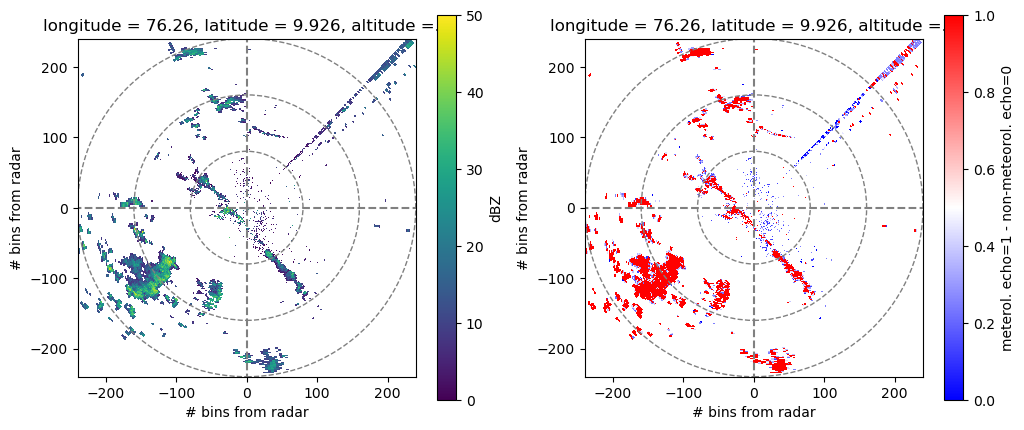

In [15]:
fig = plt.figure(figsize=(12, 5))

# Horizontal reflectivity
ax = plt.subplot(121, aspect="equal")
pm = swp.ref.plot(x="x", y="y", ax=ax, cbar_kwargs=dict(label="dBZ"))
ax = wrl.vis.plot_ppi_crosshair(site=(0, 0, 0), ranges=[80, 160, 240])
plt.xlim(-240, 240)
plt.ylim(-240, 240)
plt.xlabel("# bins from radar")
plt.ylabel("# bins from radar")

# Echo classification
ax = plt.subplot(122, aspect="equal")
pm = cmap.where(~np.isnan(swp.ref)).plot(
    x="x",
    y="y",
    ax=ax,
    cmap="bwr",
    cbar_kwargs=dict(label="meterol. echo=1 - non-meteorol. echo=0"),
)
ax = wrl.vis.plot_ppi_crosshair(site=(0, 0, 0), ranges=[80, 160, 240])
plt.xlim(-240, 240)
plt.ylim(-240, 240)
plt.xlabel("# bins from radar")
plt.ylabel("# bins from radar")

In [16]:
print(np.min(cmap.data))
print(np.max(cmap.data))

0.0
1.0


### To remove the clutter as per the derived clutter map ###

In [17]:
import copy
new_dbz = copy.deepcopy(dbz[0])
new_dbz[np.where(cmap.data < 0.5)] = np.nan

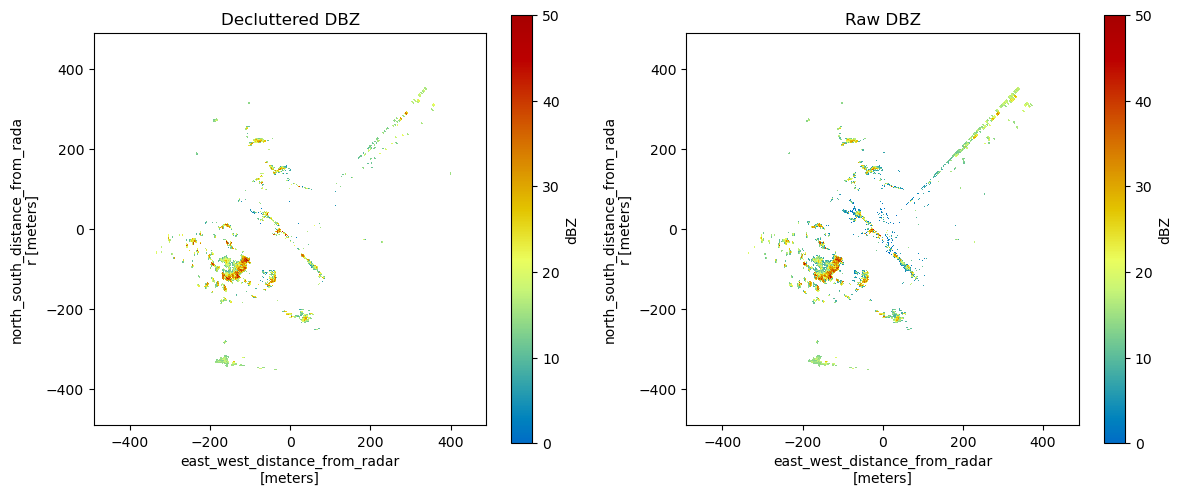

In [18]:
fig = plt.figure(figsize=(12, 5))
ax = plt.subplot(121, aspect="equal")

img1 = wrl.georef.create_xarray_dataarray(new_dbz, r=range/1000.0, phi=azims, site=(76.2622,9.9263,30.0)) # Longitude first in the site coords tuple 
img1 = img1.wrl.georef.georeference()
pm = img1.wrl.vis.plot(ax=ax,cbar_kwargs=dict(label="dBZ"))
txt = plt.title("Decluttered DBZ")

ax = plt.subplot(122, aspect="equal")
img = img.wrl.georef.georeference()
pm = img.wrl.vis.plot(ax=ax,cbar_kwargs=dict(label="dBZ"))
txt = plt.title("Raw DBZ")

plt.tight_layout()

#  Georeferencing #

In [19]:
swp1 = swp.copy()
proj_wgs84 = wrl.georef.epsg_to_osr(4326)
swp = swp.wrl.georef.georeference(crs=proj_wgs84)
display(swp)

<xarray.Dataset> Size: 41MB
Dimensions:     (azimuth: 360, range: 1633)
Coordinates: (12/14)
  * azimuth     (azimuth) float64 3kB 0.0 1.0 2.0 3.0 ... 357.0 358.0 359.0
  * range       (range) float64 13kB 0.0 0.3 0.6 0.9 ... 488.7 489.0 489.3 489.6
    longitude   float64 8B 76.26
    latitude    float64 8B 9.926
    altitude    float64 8B 30.0
    elevation   float32 4B 0.0
    ...          ...
    y           (azimuth, range) float64 5MB 9.926 9.926 9.926 ... 9.931 9.931
    z           (azimuth, range) float64 5MB 30.0 30.0 30.0 ... 30.01 30.01
    gr          (azimuth, range) float64 5MB 2.069e-13 2.712e-06 ... 0.004426
    rays        (azimuth, range) float64 5MB 0.0 0.0 0.0 ... 359.0 359.0 359.0
    bins        (azimuth, range) float64 5MB 0.0 0.3 0.6 ... 489.0 489.3 489.6
    crs_wkt     int64 8B 0
Data variables:
    rho         (azimuth, range) float32 2MB nan nan nan nan ... nan nan nan nan
    phi         (azimuth, range) float32 2MB nan nan nan nan ... nan nan nan nan
    ref         (azimuth, range) float32 2MB nan nan nan nan ... nan nan nan nan
    dop         (azimuth, range) float32 2MB nan nan nan nan ... nan nan nan nan
    zdr         (azimuth, range) float32 2MB nan nan nan nan ... nan nan nan nan
    map         (azimuth, range) bool 588kB False False True ... False False

In [20]:
elev = data['variables']['elevationList']['data'][0]
coords = wrl.georef.polar.spherical_to_proj(range, azims, elev, radar_location)
print(coords.shape)

(360, 1633, 3)


In [21]:
lons = coords[:,:,0]
lats = coords[:,:,1]
alts = coords[:,:,2]

In [22]:
print(lons.max())
print(lons.min())
print(lats.max())
print(lats.min())

80.72190604337985
71.80249395662017
14.347211008030497
5.504227526386956


In [23]:
grid = np.array([lons.ravel(),lats.ravel(),alts.ravel()]).T
print(grid.shape)
np.savetxt('kochi_dwr_lon_lat_alt.txt',grid)

(587880, 3)


In [26]:
txtdata = np.loadtxt('output_kochi_weather.txt',dtype='str',skiprows=1)

In [32]:
txtdata[:,0]

array(['9.926300,', '12.621234,', '15.316167,', ..., '4401.998976,',
       '4404.693499,', '4407.388022,'], dtype='<U13')